In [1]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195785 sha256=2fb8b23093c8de8a3ac9a6e421dbb1505aff084c84e5cf5627f3727e28e8c04f
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [2]:
import pandas as pd 
import numpy as np 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

ratings=pd.read_csv('/content/ratings_small.csv')

In [3]:
from surprise import Reader
from surprise import Dataset
from surprise import  SVD, NormalPredictor, KNNBasic
from surprise.model_selection import cross_validate
from surprise import accuracy
from IPython.display import display
from collections import defaultdict
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split

In [4]:
import surprise

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [7]:
shuffled_ratings = shuffle(ratings)

In [8]:
shuffled_ratings.shape

(98998, 4)

In [9]:
print(shuffled_ratings['rating'].max())

5.0


In [10]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_table('/content/ratings_small.csv', names=col_names)
data = data.drop('timestamp', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98999 entries, 0 to 98998
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  98999 non-null  object 
 1   item_id  0 non-null      float64
 2   rating   0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


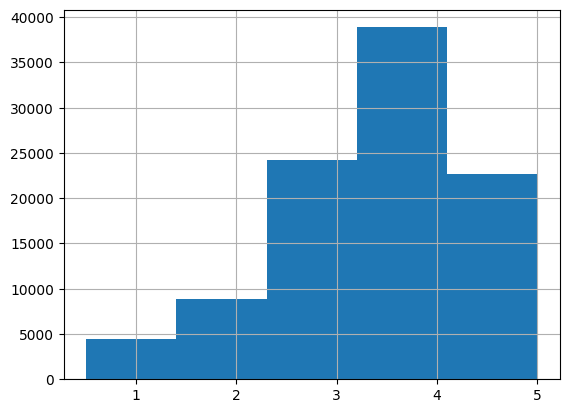

In [11]:
ratings.rating.hist(bins=5)
plt.show()

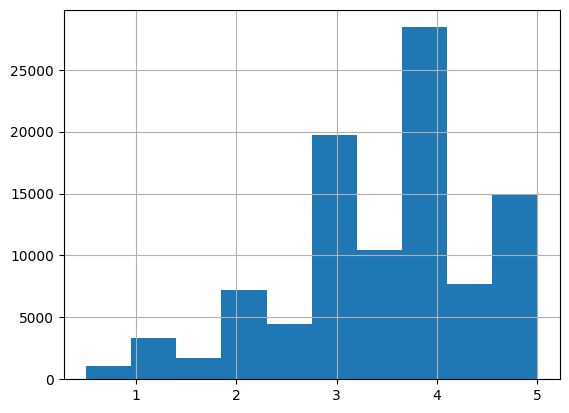

In [12]:
ratings.rating.hist()
plt.show()

In [13]:
from surprise import Dataset 
from surprise import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [14]:
PMF_RMSE = []
PMF_MAE = []
UB_RMSE = []
UB_MAE = []
IB_RMSE = []
IB_MAE = []

In [15]:
reader = Reader(line_format = "user item rating timestamp", sep = ',', skip_lines = 1)
dataset = Dataset.load_from_file("/content/ratings_small.csv", reader = reader)

In [16]:
algorithm = SVD(biased = False)
CV_PMF = cross_validate(algorithm, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0189  1.0035  1.0022  1.0149  1.0077  1.0094  0.0065  
MAE (testset)     0.7858  0.7726  0.7727  0.7844  0.7792  0.7789  0.0056  
Fit time          1.29    1.67    1.27    1.97    1.27    1.49    0.28    
Test time         0.16    0.56    0.15    0.36    0.18    0.28    0.16    


In [17]:
algorithm = KNNBasic(sim_options = {'user_based' : True })
CV_UB_CF = cross_validate(algorithm, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9642  0.9692  0.9667  0.9762  0.9682  0.9689  0.0040  
MAE (testset)     0.7461  0.7442  0.7447  0.7475  0.7434  0.7452  0.0014  
Fit time          0.12    0.25    0.13    0.13    0.18    0.16    0.05    
Test time         1.45    1.79    1.45    2.22    1.66    1.71    0.28    


In [18]:
algorithm = KNNBasic(sim_options = {'item_based' : False })
CV_IB_CF = cross_validate(algorithm, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9705  0.9709  0.9691  0.9722  0.9658  0.9697  0.0022  
MAE (testset)     0.7452  0.7471  0.7443  0.7479  0.7442  0.7458  0.0015  
Fit time          0.11    0.13    0.17    0.13    0.13    0.13    0.02    
Test time         1.56    2.38    1.57    1.48    1.55    1.71    0.34    


In [19]:
algorithm = SVD(biased = False)
CV_PMF = cross_validate(algorithm, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0146  1.0075  1.0128  1.0155  1.0061  1.0113  0.0038  
MAE (testset)     0.7840  0.7782  0.7830  0.7843  0.7781  0.7815  0.0028  
Fit time          1.32    1.82    1.93    1.30    1.30    1.53    0.28    
Test time         0.20    0.35    0.13    0.14    0.15    0.19    0.08    


In [20]:
PMF_RMSE.append(CV_PMF['test_rmse'].mean())
PMF_MAE.append(CV_PMF['test_mae'].mean())
print(PMF_RMSE)
print(PMF_MAE)  

[1.0113141813892572]
[0.7815043017018832]


In [21]:
UB_RMSE.append(CV_UB_CF['test_rmse'].mean())
UB_MAE.append(CV_UB_CF['test_mae'].mean())
print(UB_RMSE)
print(UB_MAE)

[0.9689173113604597]
[0.7451873856297506]


In [22]:
IB_RMSE.append(CV_IB_CF['test_rmse'].mean())
IB_MAE.append(CV_IB_CF['test_mae'].mean())
print(IB_RMSE)
print(IB_MAE)

[0.9697158326302973]
[0.7457607695216149]


In [23]:
algo_UB_cosine = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : True})
CV_UB_cosine = cross_validate(algo_UB_cosine, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_UB_msd = KNNBasic(sim_options = {'user_based' : True})
CV_UB_msd = cross_validate(algo_UB_msd, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_UB_pearson = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : True})
CV_UB_pearson = cross_validate(algo_UB_pearson, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

algo_IB_cosine = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : False})
CV_IB_cosine = cross_validate(algo_IB_cosine, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_IB_msd = KNNBasic(sim_options = {'user_based' : False})
CV_IB_msd = cross_validate(algo_IB_msd, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_IB_pearson = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : False})
CV_IB_pearson = cross_validate(algo_IB_pearson, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9923  0.9828  0.9992  0.9992  0.9979  0.9943  0.0063  
MAE (testset)     0.7660  0.7624  0.7724  0.7737  0.7707  0.7690  0.0042  
Fit time          0.24    0.19    0.18    0.17    0.18    0.19    0.03    
Test time         1.82    2.13    1.48    1.59    1.45    1.69    0.25    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

In [24]:
PMF_RMSE.append(CV_PMF['test_rmse'].mean())
PMF_MAE.append(CV_PMF['test_mae'].mean())
print(PMF_RMSE)
print(PMF_MAE)

[1.0113141813892572, 1.0113141813892572]
[0.7815043017018832, 0.7815043017018832]


In [25]:
UB_RMSE.append(CV_UB_CF['test_rmse'].mean())
UB_MAE.append(CV_UB_CF['test_mae'].mean())
print(UB_RMSE)
print(UB_MAE)

[0.9689173113604597, 0.9689173113604597]
[0.7451873856297506, 0.7451873856297506]


In [26]:
IB_RMSE.append(CV_IB_CF['test_rmse'].mean())
IB_MAE.append(CV_IB_CF['test_mae'].mean())
print(IB_RMSE)
print(IB_MAE)

[0.9697158326302973, 0.9697158326302973]
[0.7457607695216149, 0.7457607695216149]


In [27]:
algo_UB_cosine = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : True})
CV_UB_cosine = cross_validate(algo_UB_cosine, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_UB_msd = KNNBasic(sim_options = {'user_based' : True})
CV_UB_msd = cross_validate(algo_UB_msd, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_UB_pearson = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : True})
CV_UB_pearson = cross_validate(algo_UB_pearson, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

algo_IB_cosine = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : False})
CV_IB_cosine = cross_validate(algo_IB_cosine, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_IB_msd = KNNBasic(sim_options = {'user_based' : False})
CV_IB_msd = cross_validate(algo_IB_msd, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_IB_pearson = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : False})
CV_IB_pearson = cross_validate(algo_IB_pearson, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9942  0.9939  0.9991  0.9909  0.9990  0.9954  0.0032  
MAE (testset)     0.7700  0.7696  0.7699  0.7648  0.7719  0.7692  0.0024  
Fit time          0.19    0.23    0.19    0.19    0.28    0.22    0.03    
Test time         2.00    2.46    1.51    2.25    1.80    2.00    0.33    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

In [28]:
UB_RMSE_PLOT = []
UB_MAE_PLOT = []
UB_RMSE_PLOT.append(CV_UB_cosine['test_rmse'].mean())
UB_RMSE_PLOT.append(CV_UB_msd['test_rmse'].mean())
UB_RMSE_PLOT.append(CV_UB_pearson['test_rmse'].mean())
UB_MAE_PLOT.append(CV_UB_cosine['test_mae'].mean())
UB_MAE_PLOT.append(CV_UB_msd['test_mae'].mean())
UB_MAE_PLOT.append(CV_UB_pearson['test_mae'].mean())

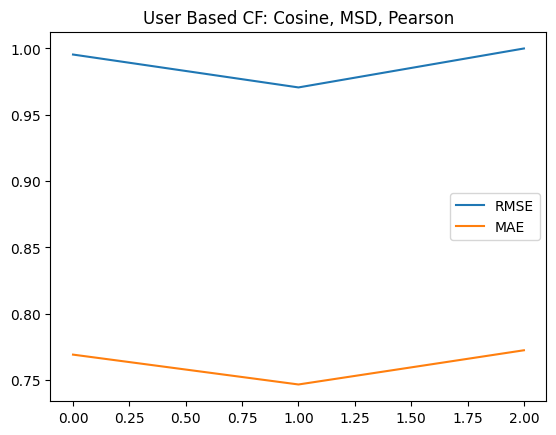

In [29]:
plt.title("User Based CF: Cosine, MSD, Pearson")
plt.plot(UB_RMSE_PLOT, label = 'RMSE')
plt.plot(UB_MAE_PLOT, label = 'MAE')
plt.legend()

In [30]:
IB_RMSE_PLOT = []
IB_MAE_PLOT = []
IB_RMSE_PLOT.append(CV_IB_cosine['test_rmse'].mean())
IB_RMSE_PLOT.append(CV_IB_msd['test_rmse'].mean())
IB_RMSE_PLOT.append(CV_IB_pearson['test_rmse'].mean())
IB_MAE_PLOT.append(CV_IB_cosine['test_mae'].mean())
IB_MAE_PLOT.append(CV_IB_msd['test_mae'].mean())
IB_MAE_PLOT.append(CV_IB_pearson['test_mae'].mean())

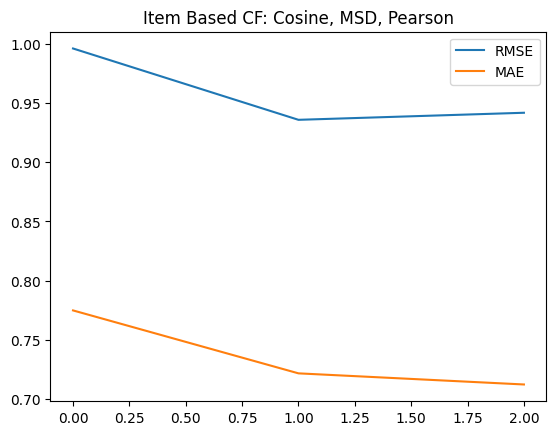

In [31]:
plt.title("Item Based CF: Cosine, MSD, Pearson")
plt.plot(IB_RMSE_PLOT, label = 'RMSE')
plt.plot(IB_MAE_PLOT, label = 'MAE')
plt.legend()

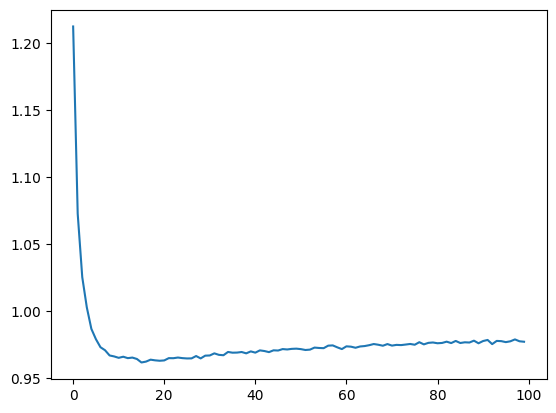

In [32]:
Range = range(1,101)
User = []

for i in Range:
        algo = KNNBasic(k = i, sim_options = {'user_based' : True }, verbose = False)
        CV_User = cross_validate(algo, dataset, measures=['rmse', 'mae'],cv = 5,verbose = False)
        User.append(CV_User['test_rmse'].mean())
        
plt.plot(User)

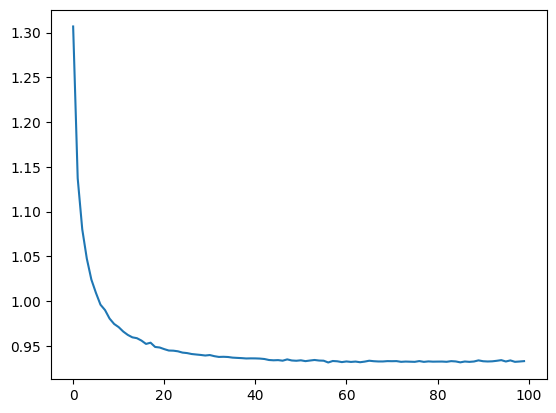

In [33]:
Range = range(1,101)
Item = []

for i in Range:
        algo = KNNBasic(k = i, sim_options = {'user_based' : False }, verbose = False)
        CV_Item = cross_validate(algo, dataset, measures=['rmse', 'mae'],cv = 5,verbose = False)
        Item.append(CV_Item['test_rmse'].mean())
        
plt.plot(Item)

In [34]:
User.index(min(User))

15

In [35]:
Item.index(min(Item))

56

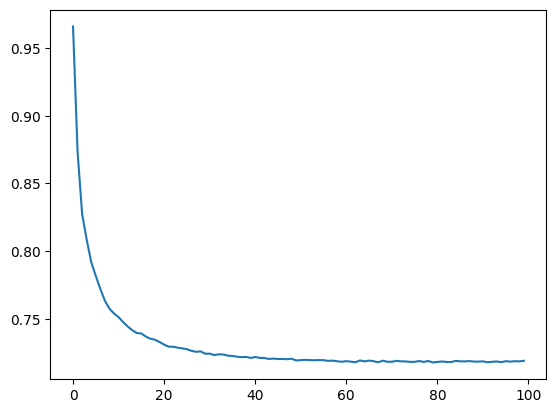

In [36]:
Range = range(1,101)
Item = []

for i in Range:
        algo = KNNBasic(k = i, sim_options = {'user_based' : False }, verbose = False)
        CV_Item = cross_validate(algo, dataset, measures=['rmse', 'mae'],cv = 5,verbose = False)
        Item.append(CV_Item['test_mae'].mean())
        
plt.plot(Item)

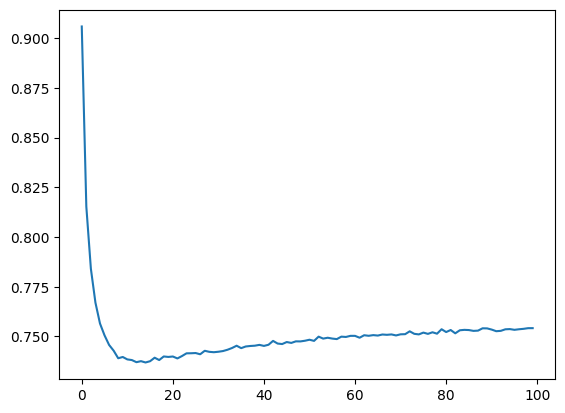

In [37]:
Range = range(1,101)
User = []

for i in Range:
        algo = KNNBasic(k = i, sim_options = {'user_based' : True }, verbose = False)
        CV_User = cross_validate(algo, dataset, measures=['rmse', 'mae'],cv = 5,verbose = False)
        User.append(CV_User['test_mae'].mean())
        
plt.plot(User)